### Program-aided Language Model (PAL) - Program Destekli Dil Modeli

Chain-of-thought prompting, modellerin karmaşık muhakeme görevlerinde daha iyi performans göstermesi için nasıl yönlendirileceğine dair iyi bir örnektir. Ancak, bazen CoT yeterli değildir çünkü yalnızca modelden oluşturulan metne bağlıdır. Program Destekli Dil Modelleri (PAL), sorunları okumak ve ara muhakeme adımları olarak programlar oluşturmak için bir LLM kullanır. Çözüm adımını Python yorumlayıcısı gibi bir çalışma zamanına yükler.

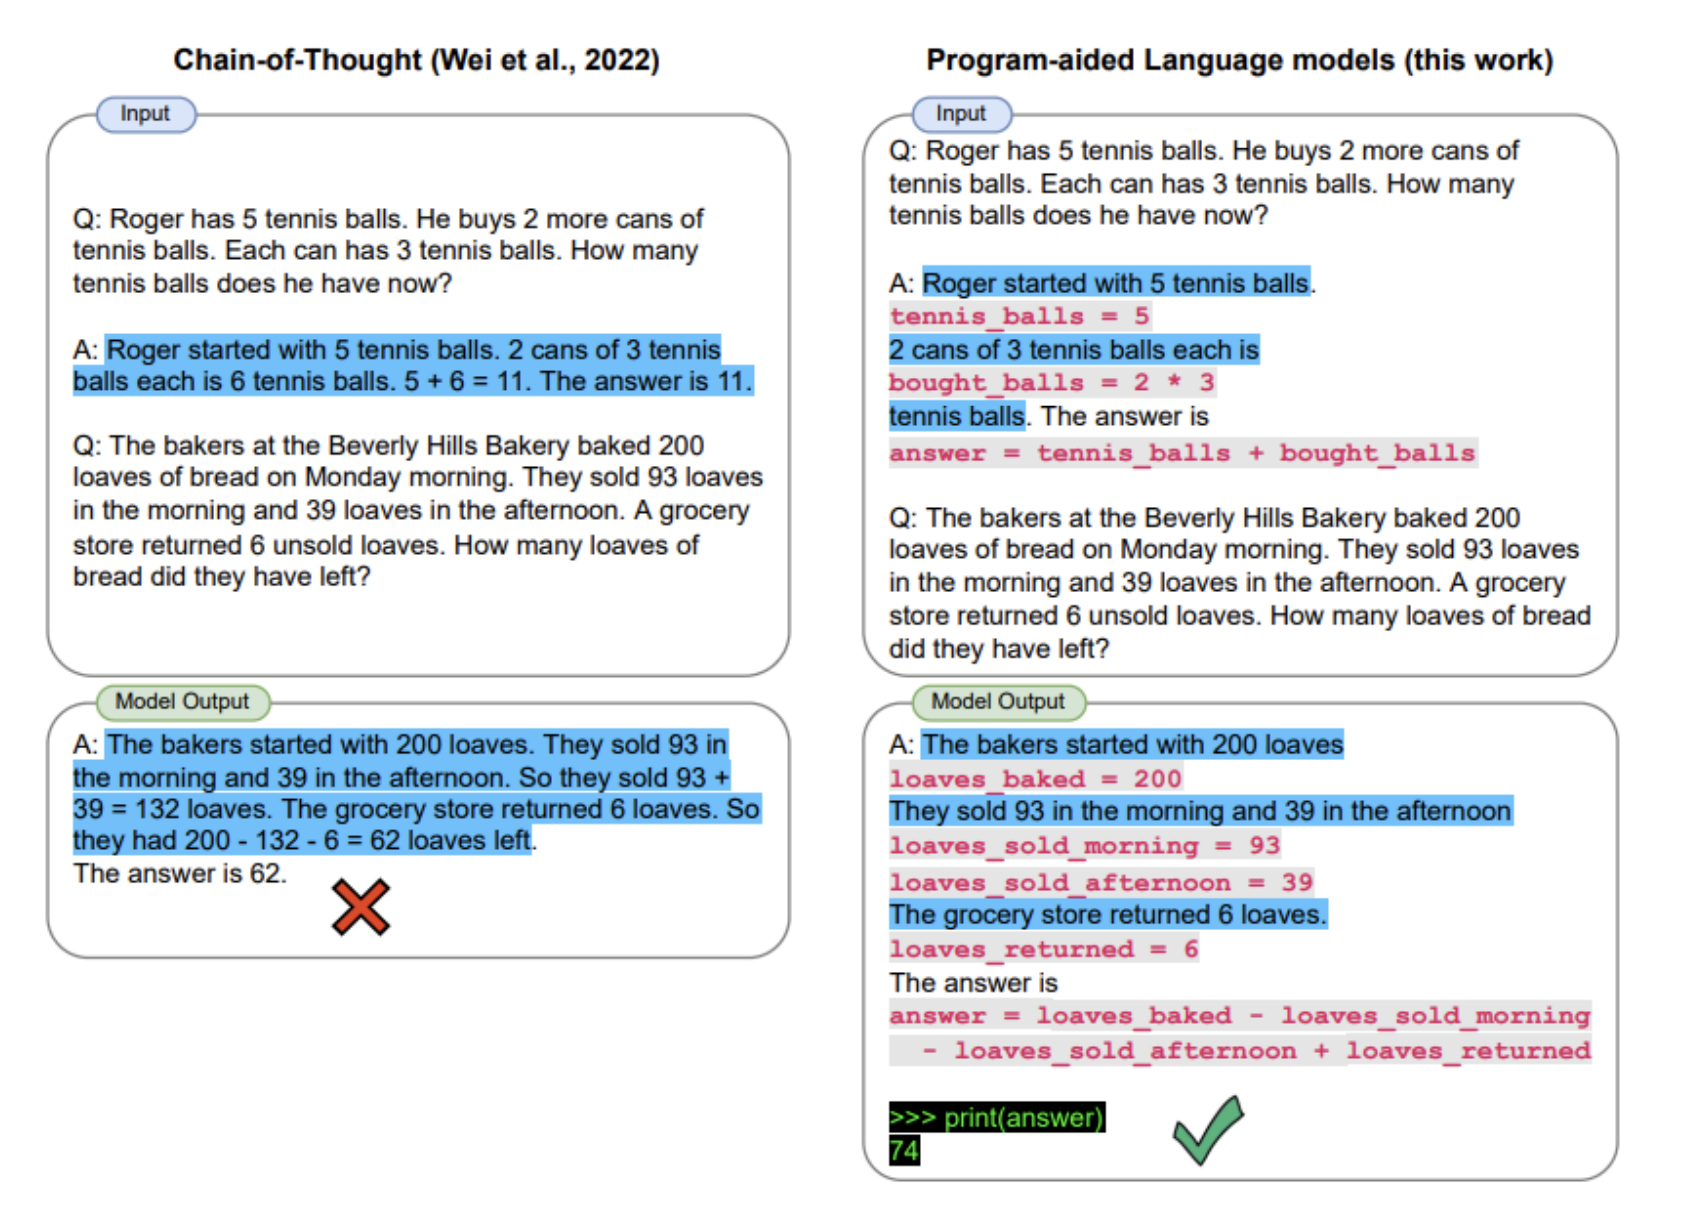

## PAL: Code as Reasoning

In [1]:
! pip3 install openai langchain-community langchain-core

In [1]:
import openai
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from dotenv import load_dotenv

In [2]:
load_dotenv()

# API configuration
openai.api_key = os.getenv("OPENAI_API_KEY")

# for LangChain
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [3]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo" ,temperature=0)

/var/folders/95/m9qjyz8151v57818xl_9y21c0000gn/T/ipykernel_69747/2003411868.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-3.5-turbo" ,temperature=0)


In [4]:
question = "Today is 27 February 2023. I was born exactly 25 years ago. What is the date I was born in MM/DD/YYYY?"

Prompt Template Link: https://github.com/reasoning-machines/pal/blob/main/pal/prompt/date_understanding_prompt.py

In [5]:
DATE_UNDERSTANDING_PROMPT = """
# Q: 2015 is coming in 36 hours. What is the date one week from today in MM/DD/YYYY?
# If 2015 is coming in 36 hours, then today is 36 hours before.
today = datetime(2015, 1, 1) - relativedelta(hours=36)
# One week from today,
one_week_from_today = today + relativedelta(weeks=1)
# The answer formatted with %m/%d/%Y is
answer = one_week_from_today.strftime('%m/%d/%Y')
# Q: The first day of 2019 is a Tuesday, and today is the first Monday of 2019. What is the date today in MM/DD/YYYY?
# If the first day of 2019 is a Tuesday, and today is the first Monday of 2019, then today is 6 days later.
today = datetime(2019, 1, 1) + relativedelta(days=6)
# The answer formatted with %m/%d/%Y is
answer = today.strftime('%m/%d/%Y')
# Q: The concert was scheduled to be on 06/01/1943, but was delayed by one day to today. What is the date 10 days ago in MM/DD/YYYY?
# If the concert was scheduled to be on 06/01/1943, but was delayed by one day to today, then today is one day later.
today = datetime(1943, 6, 1) + relativedelta(days=1)
# 10 days ago,
ten_days_ago = today - relativedelta(days=10)
# The answer formatted with %m/%d/%Y is
answer = ten_days_ago.strftime('%m/%d/%Y')
# Q: It is 4/19/1969 today. What is the date 24 hours later in MM/DD/YYYY?
# It is 4/19/1969 today.
today = datetime(1969, 4, 19)
# 24 hours later,
later = today + relativedelta(hours=24)
# The answer formatted with %m/%d/%Y is
answer = today.strftime('%m/%d/%Y')
# Q: Jane thought today is 3/11/2002, but today is in fact Mar 12, which is 1 day later. What is the date 24 hours later in MM/DD/YYYY?
# If Jane thought today is 3/11/2002, but today is in fact Mar 12, then today is 3/1/2002.
today = datetime(2002, 3, 12)
# 24 hours later,
later = today + relativedelta(hours=24)
# The answer formatted with %m/%d/%Y is
answer = later.strftime('%m/%d/%Y')
# Q: Jane was born on the last day of Feburary in 2001. Today is her 16-year-old birthday. What is the date yesterday in MM/DD/YYYY?
# If Jane was born on the last day of Feburary in 2001 and today is her 16-year-old birthday, then today is 16 years later.
today = datetime(2001, 2, 28) + relativedelta(years=16)
# Yesterday,
yesterday = today - relativedelta(days=1)
# The answer formatted with %m/%d/%Y is
answer = yesterday.strftime('%m/%d/%Y')
# Q: {question}
""".strip() + '\n'

In [7]:
# Prompt oluşturuluyor
prompt = DATE_UNDERSTANDING_PROMPT.format(question=question)

# Model çağrısı (message formatında)
llm_out = llm([HumanMessage(content=prompt)])

print ("*" * 20)

print(llm_out.content)

********************
# If today is 27 February 2023 and you were born exactly 25 years ago, then you were born on 27 February 1998.
birth_date = datetime(1998, 2, 27)
# The answer formatted with %m/%d/%Y is
answer = birth_date.strftime('%m/%d/%Y')


In [8]:
exec(llm_out.content)
print(answer)

02/27/1998
